<a href="https://colab.research.google.com/github/Roshano1/Data-Analysis/blob/main/A_B_testing_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install statsmodels


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


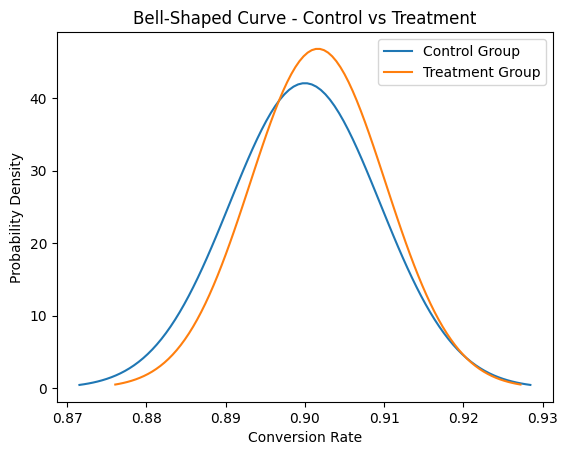

Control Conversion Rate: 0.9
Treatment Conversion Rate: 0.9016393442622951
Z-Score: 0.12852432115150422
P-Value: 0.8977340523377788


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Simulated conversion rate data
control_conversion = np.array([0] * 100 + [1] * 900)  # Control group: 100 non-purchases, 900 purchases
treatment_conversion = np.array([0] * 120 + [1] * 1100)  # Treatment group: 120 non-purchases, 1100 purchases

# Calculate conversion rates
control_successes = np.sum(control_conversion)
control_trials = len(control_conversion)
treatment_successes = np.sum(treatment_conversion)
treatment_trials = len(treatment_conversion)

control_conversion_rate = control_successes / control_trials
treatment_conversion_rate = treatment_successes / treatment_trials

# Calculate standard errors
control_std_err = np.sqrt(control_conversion_rate * (1 - control_conversion_rate) / control_trials)
treatment_std_err = np.sqrt(treatment_conversion_rate * (1 - treatment_conversion_rate) / treatment_trials)

# Calculate z-score and p-value
z_score = (treatment_conversion_rate - control_conversion_rate) / np.sqrt(control_std_err**2 + treatment_std_err**2)
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Create the bell-shaped curve plot for control group
x_control = np.linspace(control_conversion_rate - 3 * control_std_err, control_conversion_rate + 3 * control_std_err, 100)
y_control = stats.norm.pdf(x_control, control_conversion_rate, control_std_err)

# Create the bell-shaped curve plot for treatment group
x_treatment = np.linspace(treatment_conversion_rate - 3 * treatment_std_err, treatment_conversion_rate + 3 * treatment_std_err, 100)
y_treatment = stats.norm.pdf(x_treatment, treatment_conversion_rate, treatment_std_err)

# Plot the bell-shaped curves
plt.plot(x_control, y_control, label="Control Group")
plt.plot(x_treatment, y_treatment, label="Treatment Group")

# Set plot labels and title
plt.xlabel('Conversion Rate')
plt.ylabel('Probability Density')
plt.title('Bell-Shaped Curve - Control vs Treatment')
plt.legend()

# Show the plot
plt.show()

# Print the results
print("Control Conversion Rate:", control_conversion_rate)
print("Treatment Conversion Rate:", treatment_conversion_rate)
print("Z-Score:", z_score)
print("P-Value:", p_value)
